In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [34]:
data = df.copy()

In [36]:

# Tiền xử lý dữ liệu
data = data.dropna(subset=['CustomerID'])  # loại bỏ dòng thiếu CustomerID
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']  # tổng giá trị hóa đơn

# Tính đặc trưng RFM (Frequency, Quantity, Monetary)
rfm = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',      # số hóa đơn
    'Quantity': 'sum',           # tổng sản phẩm mua
    'TotalPrice': 'sum'          # tổng chi tiêu
}).reset_index()

rfm.rename(columns={'InvoiceNo': 'Frequency',
                    'Quantity': 'TotalQuantity',
                    'TotalPrice': 'Monetary'}, inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Frequency', 'TotalQuantity', 'Monetary']])

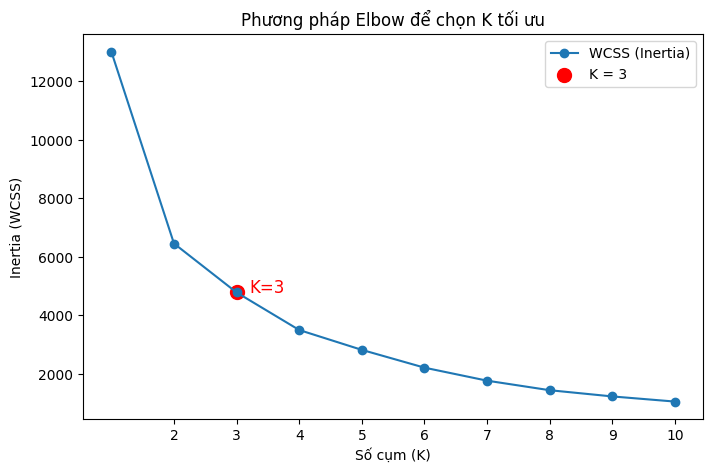

In [42]:
# Elbow Method chọn K tối ưu
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'o-', label='WCSS (Inertia)')

# Hiển thị riêng điểm K=3
plt.scatter(3, inertia[2], color='red', s=100, label='K = 3')
plt.text(3+0.2, inertia[2], 'K=3', color='red', fontsize=12)

# 🔹 Chỉnh lại trục X chỉ hiển thị từ 2 → 7
plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10])

plt.xlabel("Số cụm (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Phương pháp Elbow để chọn K tối ưu")
plt.legend()
plt.show()


### 7. K-means


Đặc trưng trung bình của từng cụm:
         Frequency  TotalQuantity       Monetary
Cluster                                         
0         3.801210     840.528864    1439.950681
1        65.571429   89810.714286  184143.690000
2        48.527778   26169.694444   39899.276389


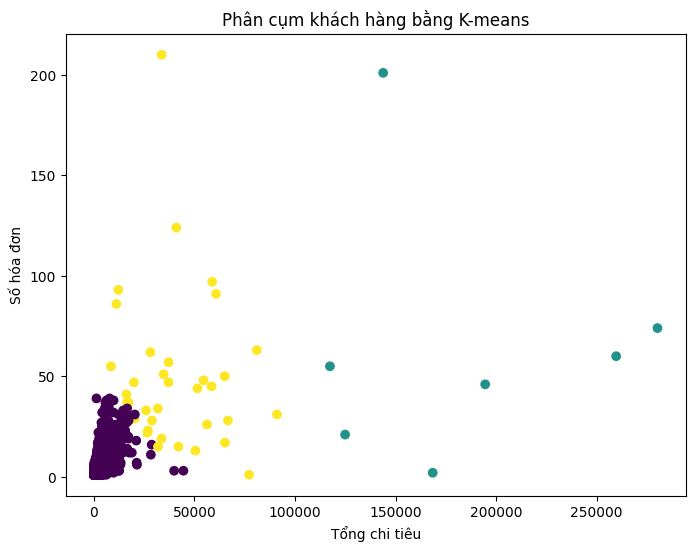

In [41]:
# Huấn luyện mô hình K-means với K=4 (ví dụ)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Tóm tắt kết quả
cluster_summary = rfm.groupby('Cluster')[['Frequency', 'TotalQuantity', 'Monetary']].mean()
print("\nĐặc trưng trung bình của từng cụm:")
print(cluster_summary)

# Biểu đồ minh họa
plt.figure(figsize=(8,6))
plt.scatter(rfm['Monetary'], rfm['Frequency'], c=rfm['Cluster'], cmap='viridis')
plt.xlabel("Tổng chi tiêu")
plt.ylabel("Số hóa đơn")
plt.title("Phân cụm khách hàng bằng K-means")
plt.show()
